In [2]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [3]:
#loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [109]:
# check missing values (NaN)
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [3]:
missing = train.isnull().sum()/len(train) # percentage of missing values
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

Here we see that PoolQC has 99%. There are also similar outcome with Alley, MiscFeature and Fence

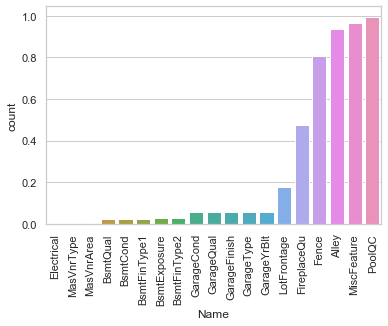

In [4]:
missing = missing.to_frame()
missing.columns = ['count']
missing.index.names = ['Name']
missing['Name'] = missing.index

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x= 'Name', y= "count", data=missing)
plt.xticks(rotation=90)
plt.show()

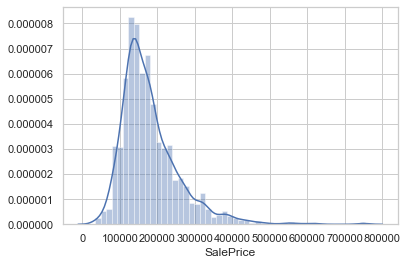

In [9]:
sns.distplot(train["SalePrice"]) 

We can see right hand skewness

In [10]:
print("The skewness of the SalePrice is {0}".format(train["SalePrice"].skew()))

The skewness of the SalePrice is 1.8828757597682129


Target value after normalizing - 0.12133506220520406


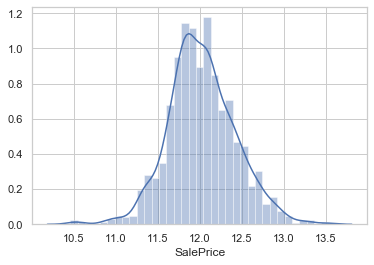

In [5]:
# transforming the skewness to the almost normal distribution
target = np.log(train["SalePrice"])
print("Target value after normalizing - {0}".format(target.skew()))
sns.distplot(target)

In [4]:
# separating data into numeric and categorical chunks
numeric = train.select_dtypes(include=[np.number])
categorical = train.select_dtypes(exclude=[np.number])
print("There are {0} numerical and {1} categorical columns".format(numeric.shape[1], 
                                                                   categorical.shape[1]))

There are 38 numerical and 43 categorical columns


In [5]:
# removing Id column from numeric data
del numeric["Id"]

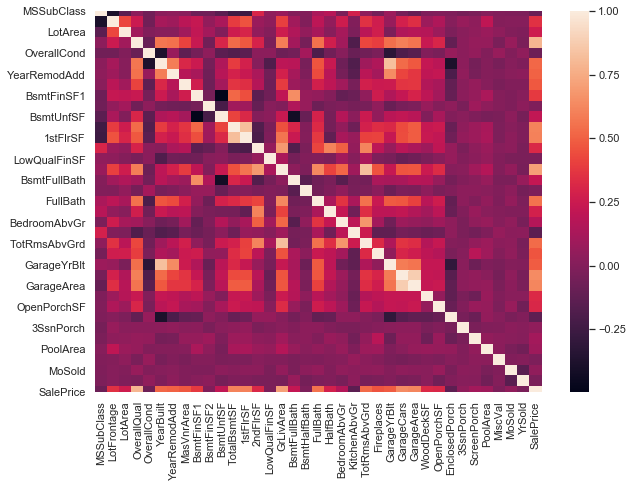

In [7]:
# correlation plot (white are the most correlated features)
corr = numeric.corr()
plt.figure(figsize=(10, 7))

sns.heatmap(corr)

In [15]:
# features that correlated with SalePrice the most and the least
print(corr["SalePrice"].sort_values(ascending=False)[:15], '\n')
print('\n', '\n')
print(corr["SalePrice"].sort_values(ascending=False)[-5:], '\n')

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 


 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



In [16]:
train["OverallQual"].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [17]:
# the mean price per quality of a house
pivot = train.pivot_table(index="OverallQual", values="SalePrice", aggfunc=np.median)
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


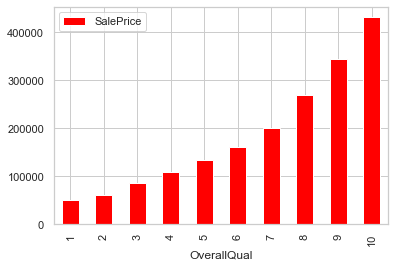

In [18]:
pivot.plot(kind='bar', color='red', grid=True)

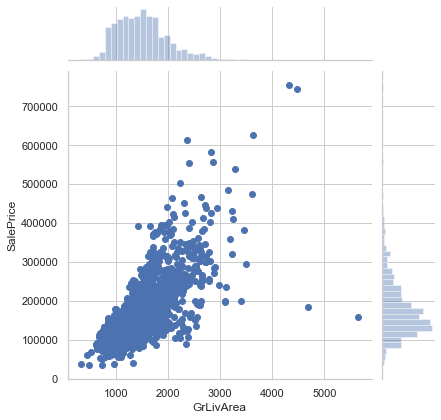

In [19]:
#GrLivArea and SalePrice
sns.jointplot(x=train["GrLivArea"], y=train["SalePrice"])

Here we see 2 outliers with big ground living area and low price.

In [20]:
categorical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [21]:
sp_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


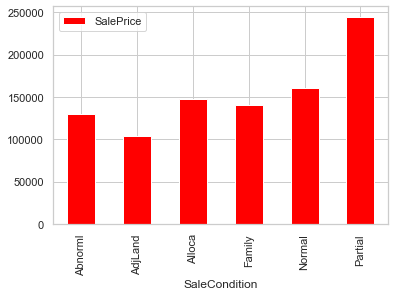

In [22]:
sp_pivot.plot(kind='bar', color='red', grid=True)

We see that Partial sale condition has the highest price. Yet we cannot analyze why due for lack of information. So we will use the ANOVA test (correlation between categorical features with SalePrice).

Our hypothesis:

H0 -- there no significant difference between the groups

Ha -- there is a significant difference

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/scipy/stats/stats.py:3225: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


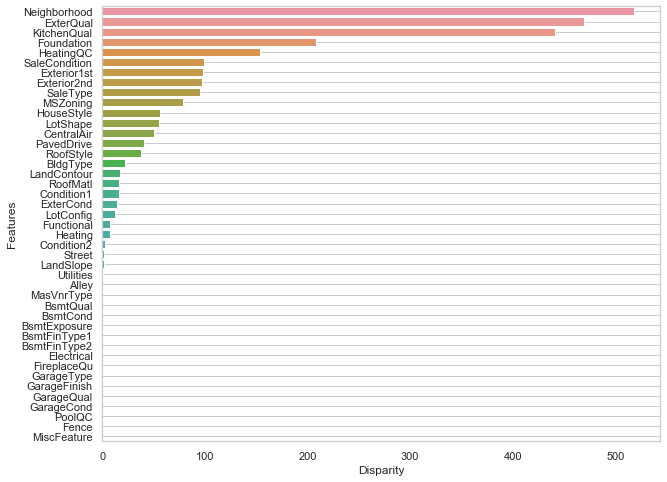

In [112]:
categ = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv["Features"] = categ
    pvals = []
    for c in categ:
        samples = []
        for cl in frame[c].unique():
            s = frame[frame[c] == cl]["SalePrice"].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv["pval"] = pvals
    return anv.sort_values('pval')

categorical["SalePrice"] = train.SalePrice.values
k = anova(categorical)
k["Disparity"] = np.log(1./k["pval"].values)
plt.figure(figsize=(10, 8))
sns.barplot(data=k, x="Disparity", y="Features")
#plt.xticks(rotation=90)
plt.grid()
plt.show()

Neighborhood turned out to be the most important feature along with ExterQual, KitchenQual, etc. It means that people also consider the goodness of the neighborhood, the quality of the kitchen, the quality of the material used on the exterior walls, etc. 

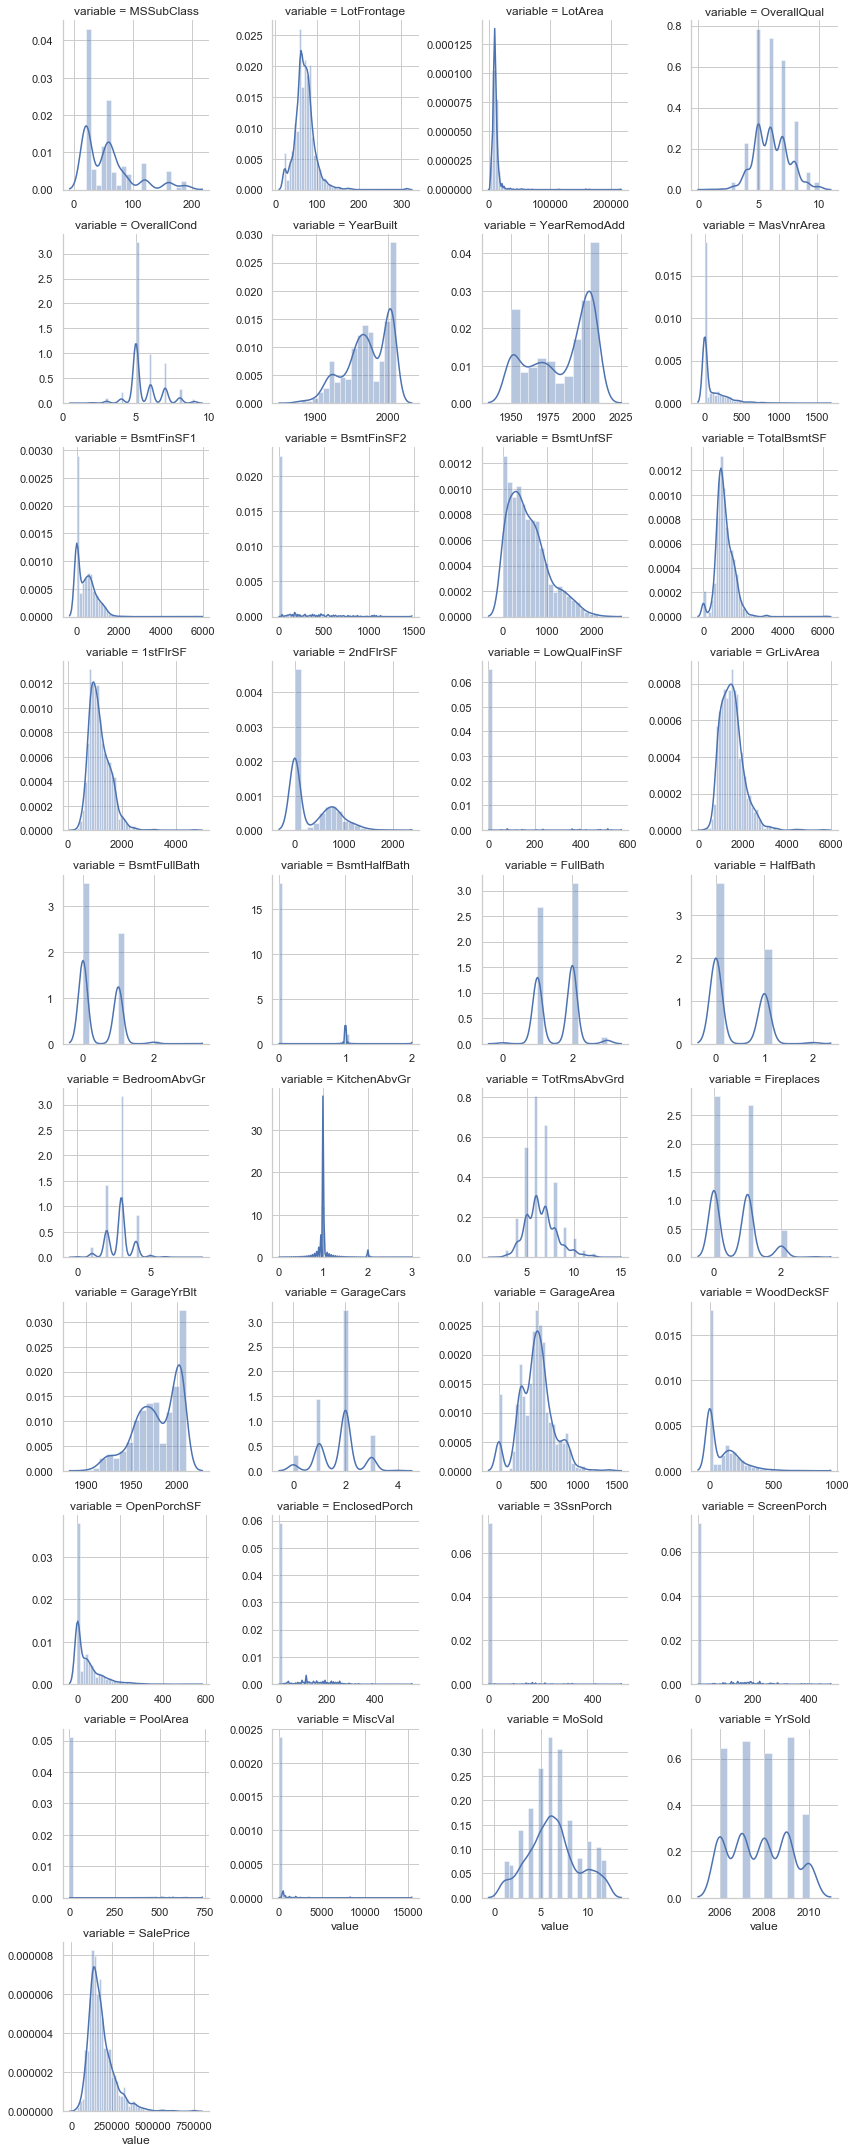

In [74]:
# create plot for numerical variables (to understand their skewness)
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid(nd, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

Most of the plots (numerical features) are right skewed. Have to normalize them later.

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


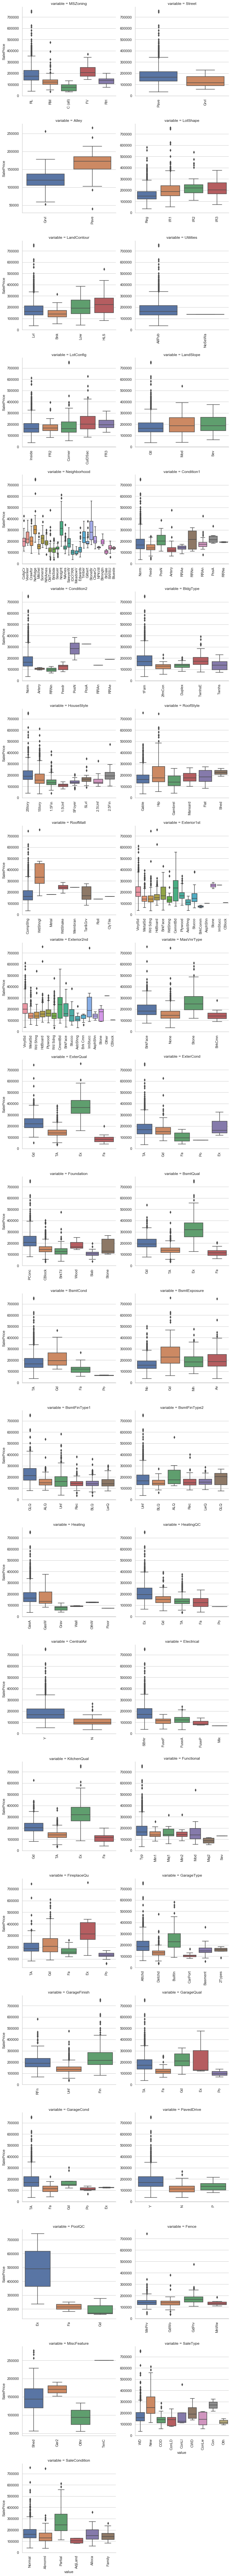

In [25]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)
    
cat = [f for f in train.columns if train.dtypes[f] == 'object']
p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid(p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value', 'SalePrice')
g

We can see that most of variables have outliers. It would be too long if we got them out one by one. Instead we will choose tree-algorithms that are robust to outliers.

In [6]:
# removing some outliers
train.drop(train[train["GrLivArea"] > 4000].index, inplace=True)
train.shape

(1456, 81)

In [7]:
# filling NaN in the Garage info (GarageQual, GarageCond, GarageFinish, GarageYrBlt) 
# with mode values
test.loc[666, "GarageQual"] = test["GarageQual"].mode()[0]
test.loc[666, "GarageCond"] = test["GarageCond"].mode()[0]
test.loc[666, "GarageFinish"] = test["GarageFinish"].mode()[0]
test.loc[666, "GarageYrBlt"] = np.nanmedian(test["GarageYrBlt"])

In [8]:
# in test all garage vars are NaN except GarageType - let's make it NaN too
test.loc[1116, "GarageType"] = np.nan

Encoding categorical variables to numerical oned (cause almost all ML algorithms cannot stand 
categorical vars)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na=None):
    """function that fills blank levels with mode values that should be entered manually (var)"""
    if fill_na != None:
        data[var].fillna(fill_na, inplace=True)
    le.fit(data[var])
    data[var] = le.transform(data[var])
    return data

In [10]:
# combine test and train datasets
alldata = train.append(test)
alldata.shape

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(2915, 81)

In [11]:
# impute LotFrontage missing values by median Neighborhood
lot_frontage_by_neighborhood = train['LotFrontage'].groupby(train['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
    idx = (alldata['Neighborhood'] == key) & (alldata['LotFrontage'].isnull())
    alldata.loc[idx, 'LotFrontage'] = group.median()

In [12]:
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond',
                 'HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
    if alldata[i].isnull().any():
        alldata[i].fillna("No", inplace=True)

In [13]:
# imputing missing values by zero for others
alldata['MasVnrArea'].fillna(0, inplace=True)
alldata["BsmtFinSF1"].fillna(0.0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)

In [14]:
# variable with Quality or Ql in their names must be converted into ordinal ones (encoded)
qual_dict = {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond',
                 'HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
    if alldata[i].isnull().any():
        alldata[i].fillna("No", inplace=True)
    alldata[i] = alldata[i].map(qual_dict).astype(int)
alldata['BsmtExposure'] = alldata['BsmtExposure'].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, 
                                                       "Gd": 4}).astype(int)

bsmt_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata['BsmtFinType1'] = alldata['BsmtFinType1'].map(bsmt_dict).astype(int)
alldata['BsmtFinType2'] = alldata['BsmtFinType2'].map(bsmt_dict).astype(int)
alldata['Functional'] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, 
                                                   "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, 
                                                   "Typ": 8}).astype(int)
alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, 
                                                       "Fin": 3}).astype(int)
alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, 
                                         "GdPrv": 4}).astype(int)


# encoding data
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType',
                  'HouseStyle','RoofStyle','Foundation','SaleCondition'])
for x in varst:
    factorize(alldata, x)
    
# encoding variables with other values
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")

### Feature Engineering

Most categorical variables have near-zero variance distribution (that is when one of the categories in a variable has >90% of the values). So therefore let's create binary variable (0/1) that shows usage of a category.

In [15]:
# The level with highest count is kept as 1, the rest is 0 
alldata["IsRegularLotShape"] = (alldata["LotShape"] == "Reg") * 1
alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsElectricalSBrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsGarageDetached"] = (alldata["GarageType"] == "Detchd") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1
alldata["Remodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1

#Did the modeling happen during the sale year?
alldata["RecentRemodel"] = (alldata["YearRemodAdd"] == alldata["YrSold"]) * 1

# Was this house sold in the year it was built?
alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1
alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1


alldata["HighSeason"] = alldata["MoSold"].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0,
                                                   9: 0, 10: 0, 11: 0, 12: 0})
alldata["NewerDwelling"] = alldata["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1,
                                                          70: 0, 75: 0, 80: 0, 85: 0, 90: 0, 
                                                          120: 1, 150: 0, 160: 0, 180: 0, 190: 0})


In [16]:
alldata.shape

(2915, 100)

In [17]:
# create alldata2 with original alldata features
alldata2 = train.append(test)

alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({"Abnorml": 1, "AdjLand": 1,
                                                                    "Alloca": 1, "Family": 1,
                                                                    "Normal": 0, "Partial": 0})
# house completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml": 0, "AdjLand": 0,
                                                            "Alloca": 0, "Family": 0,
                                                            "Normal": 1, "Partial": 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace( {"Po": 1, "Fa": 1, "TA": 0, "Gd": 0, "Ex": 0})

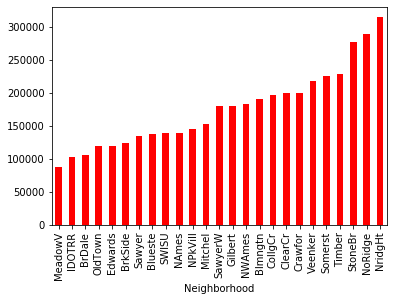

In [18]:
# calculating all area of the house 
area_cols = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", 
             "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF", 
             "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "LowQualFinSF", "PoolArea"]
alldata["AllArea"] = alldata[area_cols].sum(axis=1)
alldata["AllArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]
alldata["Age"] = 2019 - alldata["YearBuilt"]
alldata["TimeSinceSold"] = 2019 - alldata["YrSold"]
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]

# Simplifications of existing features into bad/average/good (1/2/3) based on counts
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})

#grouping Neighborhood variable and plotting median values
train["SalePrice"].groupby(train["Neighborhood"]).median().sort_values().plot(kind='bar', color='red')

Let's group neighborhood into 4 categories according to SalePrice:

In [19]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, 
                    "BrkSide" : 1, "Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, 
                    "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2,
                    "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, 
                    "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}
alldata["NeighborhoodBin"] = alldata2.Neighborhood.map(neighborhood_map)
alldata.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
alldata["Neighborhood_Good"].fillna(0, inplace=True)
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 
                                                                     'AdjLand': 1, 'Family': 1, 
                                                                     'Normal': 0, 'Partial': 0})
# House completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})
alldata.shape

(2915, 126)

Created 43 new features. Now it is time to split new data into train and test sets.

In [20]:
#create new data
train_new = alldata[alldata['SalePrice'].notnull()]
test_new = alldata[alldata['SalePrice'].isnull()]

print("Train", train_new.shape)
print('----------------')
print("Test", test_new.shape)

Train (1456, 126)
----------------
Test (1459, 126)


In [21]:
# get numeric features 
numeric_features = [f for f in train_new.columns if train_new[f].dtype != 'object']

# transform skewness of numeric features using log(x+1)
from scipy.stats import skew
skewed = train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])
del test_new["SalePrice"]

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [22]:
# Standard Scaler for standarizing data (mean = 0; std. deviation=1 -> normal distrib.)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(train_new[numeric_features])
scaled = scaler.transform(train_new[numeric_features])

# for train
for i, col in enumerate(numeric_features):
    train_new[col] = scaled[:, i]
  # for test  
numeric_features.remove("SalePrice")
scaled = scaler.fit_transform(test_new[numeric_features])

for i, col in enumerate(numeric_features):
    test_new[col] = scaled[:, i]   

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


One-hot encode categorical variables (one-hot encoding: binary values - 0/1):

In [23]:
def onehot(onehot_df, df, column_name, fill_na):
       onehot_df[column_name] = df[column_name]
       if fill_na is not None:
            onehot_df[column_name].fillna(fill_na, inplace=True)

       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df.drop([column_name], axis=1, inplace=True)
       return onehot_df

def munge_onehot(df):
       onehot_df = pd.DataFrame(index = df.index)

       onehot_df = onehot(onehot_df, df, "MSSubClass", None)
       onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
       onehot_df = onehot(onehot_df, df, "LotConfig", None)
       onehot_df = onehot(onehot_df, df, "Neighborhood", None)
       onehot_df = onehot(onehot_df, df, "Condition1", None)
       onehot_df = onehot(onehot_df, df, "BldgType", None)
       onehot_df = onehot(onehot_df, df, "HouseStyle", None)
       onehot_df = onehot(onehot_df, df, "RoofStyle", None)
       onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Foundation", None)
       onehot_df = onehot(onehot_df, df, "SaleType", "WD")
       onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")

       #Fill in missing MasVnrType for rows that do have a MasVnrArea.
       temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
       idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
       temp_df.loc[idx, "MasVnrType"] = "BrkFace"
       onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None")

       onehot_df = onehot(onehot_df, df, "LotShape", None)
       onehot_df = onehot(onehot_df, df, "LandContour", None)
       onehot_df = onehot(onehot_df, df, "LandSlope", None)
       onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr")
       onehot_df = onehot(onehot_df, df, "GarageType", "None")
       onehot_df = onehot(onehot_df, df, "PavedDrive", None)
       onehot_df = onehot(onehot_df, df, "MiscFeature", "None")
       onehot_df = onehot(onehot_df, df, "Street", None)
       onehot_df = onehot(onehot_df, df, "Alley", "None")
       onehot_df = onehot(onehot_df, df, "Condition2", None)
       onehot_df = onehot(onehot_df, df, "RoofMatl", None)
       onehot_df = onehot(onehot_df, df, "Heating", None)

       # we'll have these as numerical variables too
       onehot_df = onehot(onehot_df, df, "ExterQual", "None")
       onehot_df = onehot(onehot_df, df, "ExterCond", "None")
       onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
       onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
       onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
       onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
       onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
       onehot_df = onehot(onehot_df, df, "GarageQual", "None")
       onehot_df = onehot(onehot_df, df, "GarageCond", "None")
       onehot_df = onehot(onehot_df, df, "PoolQC", "None")
       onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
       onehot_df = onehot(onehot_df, df, "Functional", "Typ")
       onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
       onehot_df = onehot(onehot_df, df, "Fence", "None")
       onehot_df = onehot(onehot_df, df, "MoSold", None)

       # Divide  the years between 1871 and 2010 into slices of 20 years
       year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20))  for i in range(0, 7))
       yearbin_df = pd.DataFrame(index = df.index)
       yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
       yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)
       yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
       yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

       onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None)
       return onehot_df

#create one-hot features
onehot_df = munge_onehot(train)

neighborhood_train = pd.DataFrame(index=train_new.shape)
neighborhood_train['NeighborhoodBin'] = train_new['NeighborhoodBin']
neighborhood_test = pd.DataFrame(index=test_new.shape)
neighborhood_test['NeighborhoodBin'] = test_new['NeighborhoodBin']

onehot_df = onehot(onehot_df, neighborhood_train, 'NeighborhoodBin', None)

In [24]:
onehot_df.shape

(1456, 307)

In [25]:
train_new = train_new.join(onehot_df)
train_new.shape

(1456, 433)

In [26]:
# adding one-hot variable to test set
onehot_df_te = munge_onehot(test)
onehot_df_te = onehot(onehot_df_te, neighborhood_test, "NeighborhoodBin", None)
test_new = test_new.join(onehot_df_te)
test_new.shape

(1459, 417)

There are some difference in train and test shape. Because some features in the train
are not available for the test

In [27]:
# dropping these columns from the train data
drop_cols = ["_Exterior1st_ImStucc", "_Exterior1st_Stone","_Exterior2nd_Other","_HouseStyle_2.5Fin",
             "_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll", "_Condition2_RRAe", "_Condition2_RRAn", 
             "_Condition2_RRNn", "_Heating_Floor", "_Heating_OthW", "_Electrical_Mix", "_MiscFeature_TenC", 
             "_GarageQual_Ex",  "_PoolQC_Fa"]
train_new.drop(drop_cols, axis=1, inplace=True)
train_new.shape

(1456, 417)

In [28]:
# removing one columns missing from train data
test_new.drop(["_MSSubClass_150"], axis=1, inplace=True)

# drop these columns 
drop_cols = ["_Condition2_PosN", # only two are not zero
             "_MSZoning_C (all)",
             "_MSSubClass_160"]
train_new.drop(drop_cols, axis=1, inplace=True)
test_new.drop(drop_cols, axis=1, inplace=True)

In [31]:
check = [col for col in test_new.columns if test_new[col].dtypes == 'object']
for column in check:
    test_new.drop(column, axis=1, inplace=True)
    train_new.drop(column, axis=1, inplace=True)

In [32]:
train_new.sort_index(axis=1, inplace=True)
test_new.sort_index(axis=1, inplace=True)

In [33]:
# delete Neighborhoodbin -1.... that doesn't exist in test set (but does in train one)
test_new.drop("_NeighborhoodBin_-1.0875767879360991", axis=1, inplace=True)
train_new.drop("_NeighborhoodBin_-0.04760808471778121", axis=1, inplace=True)

### Model Training and Evaluation

We will use three algorithms: XGBoost, Neural Network and Lasso Regression

In [37]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree = 0.2, gamma = 0.0, learning_rate = 0.05,
                       max_depth = 6, min_child_weight = 1.5, n_estimators = 7200,
                       reg_alpha = 0.9, reg_lambda = 0.6, subsample = 0.2, seed = 42,
                       silent = 1)
#train_arr = np.array(train_new)
train_x = train_new.drop(columns=['SalePrice'], axis=1)
train_y = pd.DataFrame(index = train_new.index, columns = ["SalePrice"])
train_y["SalePrice"] = np.log(train["SalePrice"])
regr.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
             silent=1, subsample=0.2, verbosity=1)

In [46]:
# RMSE function
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = regr.predict(train_x)
y_test = train_y
print("XGBoost score on training set: ", rmse(y_test, y_pred))

# make prediction on test set
y_pred_xgb = regr.predict(test_new)

#submit this prediction and get the score
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': np.exp(y_pred_xgb)})
pred1.to_csv('xgbnew.csv', header=True, index=False)

XGBoost score on training set:  0.03729161328948449


In [45]:
train_y

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1455,12.072541
1456,12.254863
1457,12.493130
1458,11.864462


In [47]:
predicted = pd.read_csv('xgbnew.csv')
predicted.head()

,Id,SalePrice
0,1461,139341.31
1,1462,166000.14
2,1463,180653.10
3,1464,193677.23
4,1465,181320.89


In [48]:
from sklearn.linear_model import Lasso

#found the best alpha using cross-validation
best_alpha = 0.00099

model = Lasso(alpha=best_alpha, max_iter = 50000)
model.fit(train_x, train_y)

# run prediction on the training set to get a rough idea of how well it does
y_pred = model.predict(train_x)
y_test = label_df
print("Lasso score on training set: ", rmse(y_test, y_pred))

Lasso score on training set:  0.10165835212058665


In [49]:
#make prediction on the test set
y_pred_lasso = regr.predict(test_new)
lasso_ex = np.exp(y_pred_lasso)
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': lasso_ex})
pred1.to_csv('lasso_model.csv', header=True, index=False)

In [50]:
lasso_model = pd.read_csv('lasso_model.csv')
lasso_model.head()

,Id,SalePrice
0,1461,139341.31
1,1462,166000.14
2,1463,180653.10
3,1464,193677.23
4,1465,181320.89


#### We see that lasso model has even outperformed xgboost. Let's try neural network (we have multidimensional dataset - a lot of features)

In [74]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# create Model
# define base model
def base_model():
    model = Sequential()
    model.add(Dense(20, input_dim=399, init='normal', activation='relu'))
    model.add(Dense(10, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

seed = 7
np.random.seed(seed)

scale = StandardScaler()
X_train = scale.fit_transform(train_x)
X_test = scale.fit_transform(test_new)

keras_label = train_y.as_matrix()
clf = KerasRegressor(build_fn=base_model, nb_epoch=1000, batch_size=5, verbose=0)
clf.fit(X_train, keras_label)

# make prediction and create the submission file
kpred = clf.predict(X_test)
#kpred = np.exp(kpred)
pred_df = pd.DataFrame(kpred, index=test["Id"], columns = ["SalePrice"])
pred_df.to_csv('keras_model.csv', header=True, index_label='Id')
# rmse
print("Neural Network score on training set: ", rmse(keras_label, kpred[:1456]))

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_dim=399, activation="relu", kernel_initializer="normal")`
  if sys.path[0] == '':
/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="normal")`
  del sys.path[0]
/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
  


Neural Network score on training set:  2.7766462942255363


In [72]:
keras_model = pd.read_csv('keras_model.csv')
keras_model.head()

,Id,SalePrice
0,1461,13.700437
1,1462,4.229743
2,1463,11.852982
3,1464,12.854720
4,1465,13.087642


In [78]:
train["SalePrice"]
te

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1456, dtype: int64

In [ ]:
# todo: SalePrice has been changing along the way of feature engineering, so 